In [7]:
import json
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
METRICS = ["f1", "accuracy", "matthews_correlation"]
EXPLAINERS = ["shap", "lime", "integrated gradient", "integrated gradient multiply by inputs"]
EXPLAINER_NAMES = ["Shap", "Lime", "Ig", "Igmby"]
EVALUATORS = ["comprehensiveness", "sufficency", "tauloo", "auprc plausibility", "f1 plausibility", "iou plausibility"]
EVALUATOR_NAMES= ["Comprehensiveness", "Sufficency", "Tauloo", "Auprc Plausibility", "F1 Plausiblity", "Iou Plausiblity"]

In [14]:
PHENOMENA = ["synonym", "antonym", "hypernym", "hyponym", "co_hyponym","quantifiers", "numericals"]
IMAGE_BASE_PATH = "../report/images/ferret_heatmaps_phenomena/filtered_3_3_longer/"
PHENOMENA_BASE_PATH = "../datasets/esnli_evaluations_per_phenomena/"

def image_path(phenomena):
    return IMAGE_BASE_PATH + phenomena + ".pdf"

def data_path(phenomena):
    return PHENOMENA_BASE_PATH + "esnli_evaluations_" + phenomena + ".json"

def read_data(phenomena):
    with open(data_path(phenomena), "r") as f:
        return f.read()

In [40]:
def plot_heatmap(data):  
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt=".4f")
    ax.set(xlabel='Explainer', ylabel='Evaluator')
    ax.xaxis.set_label_position('top')
    plt.tick_params(axis='both', which='major', labelbottom=False, bottom=False, top=False, labeltop=True)
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(image_path(data.name), dpi=200, bbox_inches="tight")
    plt.show()

In [41]:
phenomena_data = [(phenomena, json.loads(read_data(phenomena))) for phenomena in PHENOMENA]

In [42]:
def transform_data(data):
    return {
        explainer: [evaluation["mean"] for evaluator, evaluation in explanations.items()] for explainer, explanations in data.items()}


phenomena_data = [(phenomena, transform_data(data)) for phenomena, data in phenomena_data]

In [56]:
def make_df(data):
    df = pd.DataFrame(data[1])
    df.name = data[0]
    df.index = EVALUATOR_NAMES
    df.columns = EXPLAINER_NAMES
    return df

phenomena_dfs = [make_df(data) for data in phenomena_data]

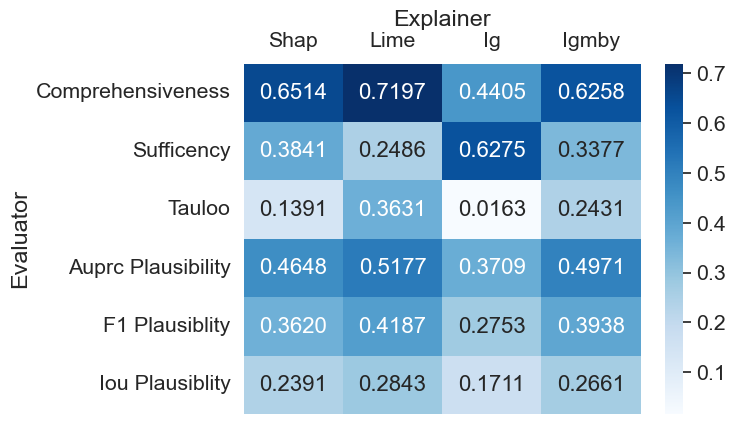

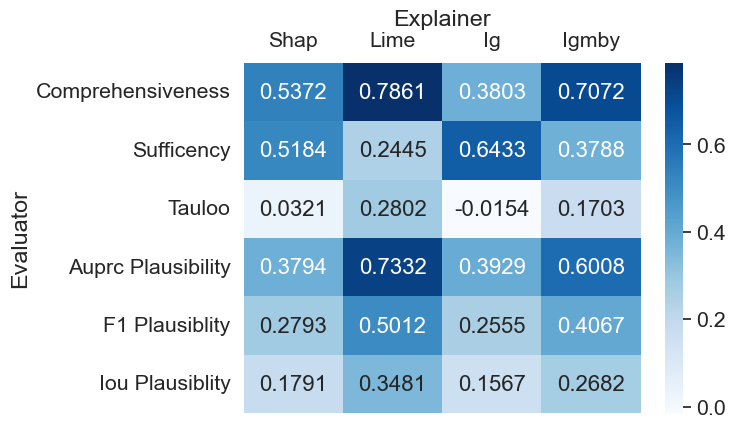

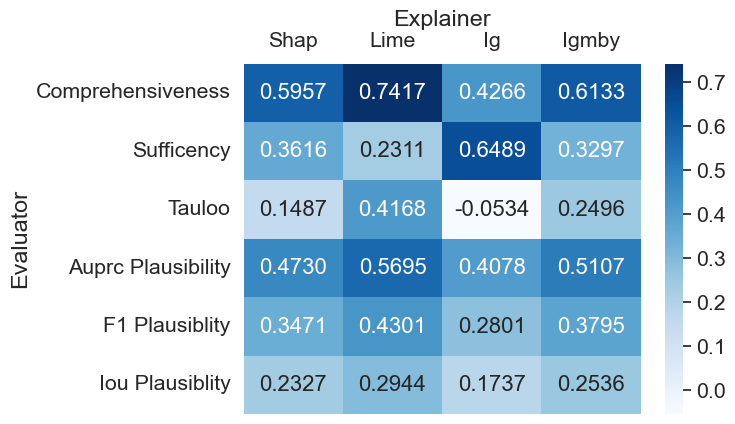

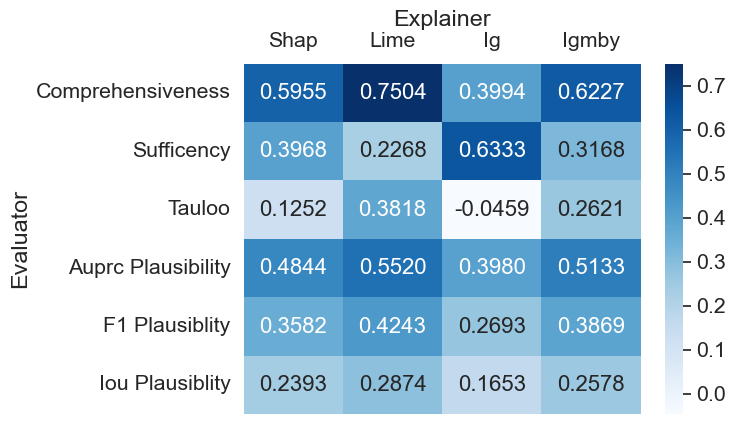

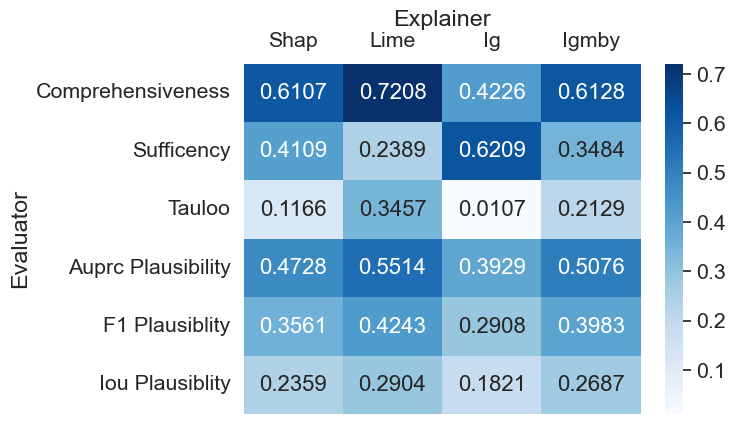

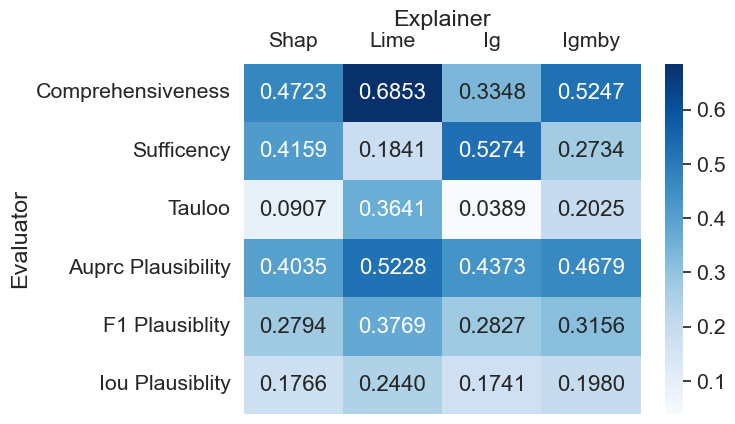

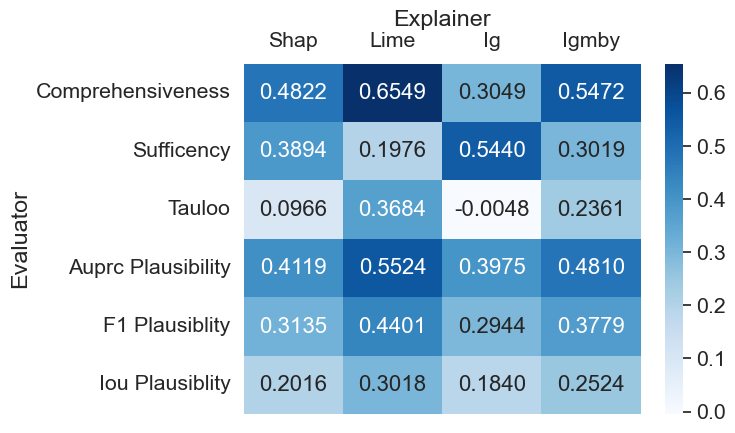

In [59]:
for df in phenomena_dfs:
    plot_heatmap(df)